<a href="https://colab.research.google.com/github/Icaro92/api_eda_coqueteis/blob/main/API_EDA_Coquet%C3%A9is.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados (EDA) de Coquetéis**

Estou realizando um projeto de Análise Exploratória de Dados (EDA) de coquetéis utilizando a API da TheCocktailDB. O objetivo do projeto é explorar o incrível mundo dos coquetéis e suas receitas, a motivação do projeto é meu interesse pessoal por coquetelaria.




## Importando os dados - API TheCocktailDB

In [ ]:
#setup
import pandas as pd #manusear dados
import numpy as np #algebra linear


import matplotlib.pyplot as plt #visualização de dados
import seaborn as sns #visualização de dados
import requests # conexão com API

#estilo visualizações
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})



In [ ]:
#FUNÇÃO DE CONEXÃO COM A API

def fetch_all_cocktails():
  base_url = "https://www.thecocktaildb.com/api/json/v1/1/"
  all_cocktails = []

  #pegar os coqueteis de cada primeira letra
  for letter in 'abcdefghijklmnopqrstuvwxyz':
    response = requests.get(f'{base_url}search.php?f={letter}')
    data = response.json()
    if data['drinks']:
      all_cocktails.extend(data['drinks'])

  return all_cocktails


In [ ]:
# FUNÇÃO DE CRIAR O DATAFRAME

def create_dataframe(cocktails):
       df = pd.DataFrame(cocktails)

       # renomear as colunas
       df = df.rename(columns={
           'strDrink': 'name',
           'strCategory': 'category',
           'strAlcoholic': 'alcoholic',
           'strGlass': 'glass',
           'strInstructions': 'instructions'
       })

       # extrair ingredientes e medidas
       for i in range(1, 16):
           df[f'ingredient_{i}'] = df[f'strIngredient{i}']
           df[f'measure_{i}'] = df[f'strMeasure{i}']
           df = df.drop(columns=[f'strIngredient{i}', f'strMeasure{i}'])

       return df

In [ ]:
# APLICANDO AS FUNÇÕES
all_cocktails = fetch_all_cocktails() #pegar os coqueteis
df = create_dataframe(all_cocktails) # criar o df


## Entendendo os dados
Entendendo os Dados: Inicialmente, realizei uma análise dos dados disponíveis na API, compreendendo suas estruturas e características.

In [ ]:
df.head(2)

,idDrink,name,strDrinkAlternate,strTags,strVideo,category,strIBA,alcoholic,glass,instructions,...,ingredient_11,measure_11,ingredient_12,measure_12,ingredient_13,measure_13,ingredient_14,measure_14,ingredient_15,measure_15
0,17222,A1,None,None,None,Cocktail,None,Alcoholic,Cocktail glass,"Pour all ingredients into a cocktail shaker, m...",...,None,None,None,None,None,None,None,None,None,None
1,13501,ABC,None,None,None,Shot,None,Alcoholic,Shot glass,Layered in a shot glass.,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df.shape # numero de linhas e colunas

(426, 51)

In [ ]:
#salvando em um novo df para fins de tratamento
df_original = df.copy()

In [ ]:
df.columns # nome das colunas

Index(['idDrink', 'name', 'strDrinkAlternate', 'strTags', 'strVideo',
       'category', 'strIBA', 'alcoholic', 'glass', 'instructions',
       'strInstructionsES', 'strInstructionsDE', 'strInstructionsFR',
       'strInstructionsIT', 'strInstructionsZH-HANS', 'strInstructionsZH-HANT',
       'strDrinkThumb', 'strImageSource', 'strImageAttribution',
       'strCreativeCommonsConfirmed', 'dateModified', 'ingredient_1',
       'measure_1', 'ingredient_2', 'measure_2', 'ingredient_3', 'measure_3',
       'ingredient_4', 'measure_4', 'ingredient_5', 'measure_5',
       'ingredient_6', 'measure_6', 'ingredient_7', 'measure_7',
       'ingredient_8', 'measure_8', 'ingredient_9', 'measure_9',
       'ingredient_10', 'measure_10', 'ingredient_11', 'measure_11',
       'ingredient_12', 'measure_12', 'ingredient_13', 'measure_13',
       'ingredient_14', 'measure_14', 'ingredient_15', 'measure_15'],
      dtype='object')

In [ ]:
#verificando colunas nulas
df.isnull().sum()

,0
idDrink,0
name,0
strDrinkAlternate,426
strTags,325
strVideo,404
category,0
strIBA,365
alcoholic,0
glass,0
instructions,0


## Tratando os dados

In [ ]:
#retirando colunas de instruções em oturas linguas
df.drop(columns=['strInstructionsES', 'strInstructionsDE', 'strInstructionsFR', 'strInstructionsIT', 'strInstructionsZH-HANS', 'strInstructionsZH-HANT'], inplace=True)

In [ ]:
#retirando colunas de imagens,videos e date modified
df.drop(columns=['strDrinkThumb', 'strImageSource', 'dateModified','strImageAttribution', 'strVideo', 'strDrinkAlternate', 'strTags'], inplace=True)

In [ ]:
# retirar drinks acima de 12 ingredientes, que estão nulos
df.drop(columns=['ingredient_13', 'measure_13',
       'ingredient_14', 'measure_14', 'ingredient_15', 'measure_15'],inplace = True )

In [ ]:
df.columns

Index(['idDrink', 'name', 'category', 'strIBA', 'alcoholic', 'glass',
       'instructions', 'strCreativeCommonsConfirmed', 'ingredient_1',
       'measure_1', 'ingredient_2', 'measure_2', 'ingredient_3', 'measure_3',
       'ingredient_4', 'measure_4', 'ingredient_5', 'measure_5',
       'ingredient_6', 'measure_6', 'ingredient_7', 'measure_7',
       'ingredient_8', 'measure_8', 'ingredient_9', 'measure_9',
       'ingredient_10', 'measure_10', 'ingredient_11', 'measure_11',
       'ingredient_12', 'measure_12'],
      dtype='object')

In [ ]:
df.shape

(426, 32)

In [ ]:
df.to_excel('coqueteis_tratado_1.xlsx')

## Exporando os dados

## Coquetéis por Categoria

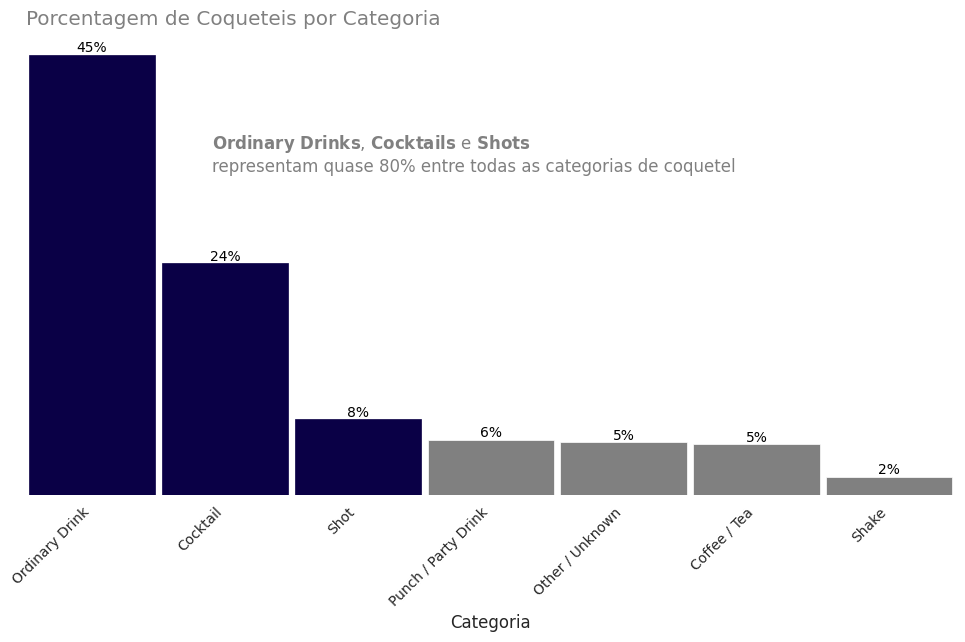

In [ ]:
df_percentage = df.groupby('category').agg({
    'name' : 'count'}).sort_values(by = 'name', ascending=False).reset_index() # agrupando categoria de bebidas
df_percentage['percentage'] = df_percentage['name']/df_percentage['name'].sum() * 100 # calculcando a percentagem

# fazendo o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='category', y='percentage', color='gray', width = 0.95, data=df_percentage[:7])
sns.set_style("whitegrid", {'axes.grid': False})
sns.despine(left=True, bottom=True)


# alterando a cor das três primeiras barras
for i, bar in enumerate(ax.patches):
    if i < 3:
        bar.set_color('#0a0046')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.text(0.20, 0.70, r'$\bf{Ordinary\ Drinks}$, $\bf{Cocktails}$ e $\bf{Shots}$' + '\n' + 'representam quase 80% entre todas as categorias de coquetel',
        fontsize=12,
        color='gray',
        transform=ax.transAxes)

plt.xticks(rotation = 45, ha='right')
ax.yaxis.set_visible(False)
plt.title('Porcentagem de Coqueteis por Categoria', loc='left', color='gray')
plt.xlabel('Categoria');

## Coqueteis Alcoólicos vs não-alcoólicos

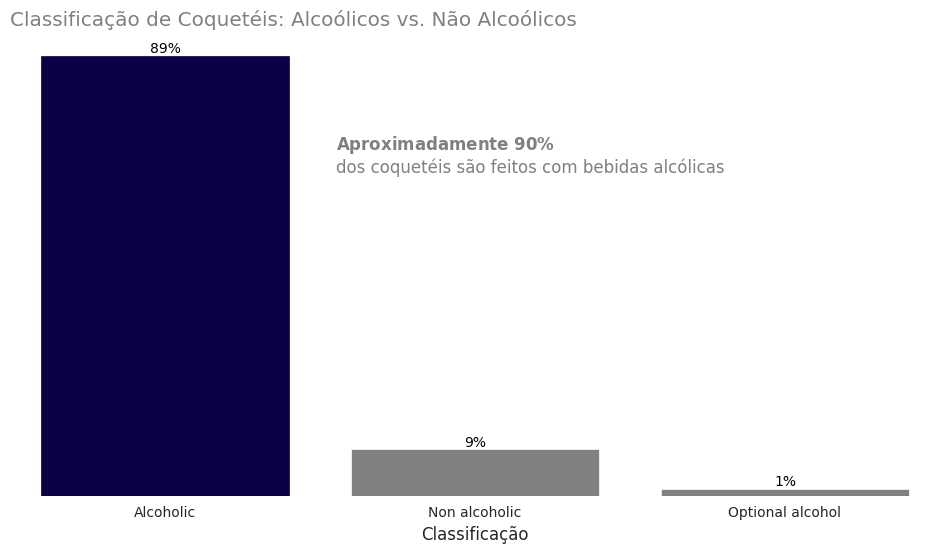

In [ ]:
df_alcohol = df.groupby('alcoholic')['name'].count().reset_index().sort_values(by = 'name', ascending=False).rename(columns = {'name':'count'})
df_alcohol['percentage'] = df_alcohol['count']/df_alcohol['count'].sum() * 100
df_alcohol.round()

plt.figure(figsize = (12,6))
ax = sns.barplot(data=df_alcohol, x='alcoholic', y='percentage', color='grey')
sns.despine(left=True, bottom=True)
sns.set_style("whitegrid", {'axes.grid': False})


for i, bar in enumerate(ax.patches):
    if i < 1:
        bar.set_color('#0a0046')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


ax.text(0.35, 0.7, r'$\bf{Aproximadamente\ 90\%}$' + '\n' + 'dos coquetéis são feitos com bebidas alcólicas',
        fontsize=12,
        color='gray',
        transform=ax.transAxes)


ax.yaxis.set_visible(False)
plt.title('Classificação de Coquetéis: Alcoólicos vs. Não Alcoólicos', loc='left', color='gray')
plt.xlabel('Classificação');
plt.show()

## Bebidas alcoólicas mais utilizadas em coquetéis

A bebida alcólica é um ingrediente, mas não precisa necessariamente ser o primeiro ingrediente. Podem haver bebidas alcóolicas em qualquer uma das colunas, conforme vemos abaixo.

Para resolver esse problema, iremos criar uma lista com todas as bebidas alcólicas que encontrarmos no dataset, contar as aparições dessas bebidas, ordenar a contagem e plotar em um grafico.

In [ ]:
df[['ingredient_1', 'ingredient_2', 'ingredient_3']].value_counts() #nesse caso percebo que podem haver bebidas alcóolicas em mais de uma coluna

ingredient_1     ingredient_2    ingredient_3  
Gin              Lemon juice     Sugar             3
Light rum        Triple sec      Lime juice        3
Gin              Lemon           Powdered sugar    3
Blended whiskey  Lemon           Powdered sugar    3
Scotch           Sweet Vermouth  Dry Vermouth      2
                                                  ..
Gin              Grenadine       lemon             1
                                 Powdered sugar    1
                                 Light cream       1
                                 Lemon             1
gin              Peach Bitters   Mint              1
Name: count, Length: 351, dtype: int64

In [ ]:
# criando lista de bebidas alcóolicas.
bebidas_alcoolicas = [
    'vodka', 'rum', 'gin', 'tequila', 'whiskey', 'bourbon', 'brandy', 'cognac',
    'liqueur', 'vermouth', 'champagne', 'wine', 'beer', 'scotch', 'absinthe',
    'cachaca', 'sake', 'schnapps', 'port', 'sherry', 'mezcal', 'grappa', 'triple sec', 'light rum',
    'melon liqueur',  'gold rum','amaro montenegro', 'cherry liqueur', 'apfelkorn '  ,  'grain alcohol',
    'tennessee whiskey', 'peach brandy', 'red wine', 'lime vodka', 'maraschino liqueur',
    'amaretto',  'dry vermouth', 'sweet vermouth', 'baileys irish cream', 'dark rum','aperol',
    'peach vodka','lillet', 'peach vodka', 'whisky', 'root beer', 'apple brandy','ginger ale', 'chambord raspberry liqueur', 'ginger', 'apricot brandy', 'white rum',
    'irish whiskey', 'cherry brandy', 'malibu rum', 'root beer', 'coffee liqueur',
    'spiced rum', 'chocolate liqueur', 'coconut liqueur', 'banana liqueur', 'ginger beer',
    'apple brandy', 'white wine', 'blackstrap rum', 'ginger syrup', 'raspberry liqueur', 'godiva liqueur',
    'raspberry vodka', 'coffee brandy', 'cranberry vodka', 'kiwi liqueur', 'peach vodka' # trecho de código criado por mim

    # trecho de código extraido por uso de inteligência artifical

    "Gin", "Grand Marnier", "Amaretto", "Baileys irish cream", "Cognac", "151 proof rum", "Wild Turkey",
    "Absolut Vodka", "Dark rum", "Applejack", "Strawberry schnapps", "Pisang Ambon", "Kahlua", "Vermouth",
    "Scotch", "Light rum", "Crown Royal", "Bourbon", "Blackberry brandy", "Campari", "Blended whiskey",
    "Sloe gin", "Sambuca", "Orange Bitters", "Green Chartreuse", "Blue Curacao", "Rye Whiskey", "Maraschino liqueur",
    "Galliano", "Cherry Heering", "Bacardi Limon", "Everclear", "Midori melon liqueur", "Jägermeister",
    "Southern Comfort", "Goldschlager", "Champagne", "Peach schnapps", "Brandy", "Rum", "Cachaca",
    "Añejo rum", "Port", "Cointreau", "Tequila", "Absinthe", "Dubonnet Rouge", "Mezcal", "Rose"
]

In [ ]:
# função para contar bebidas alcólicas
def count_bebidas(row):
    contagem = {}
    for i in range(1, 16):
        ingrediente = row.get(f'ingredient_{i}')
        if isinstance(ingrediente, str):
            ingrediente_lower = ingrediente.lower()
            for bebida in bebidas_alcoolicas:
                if bebida in ingrediente_lower:
                    contagem[bebida] = contagem.get(bebida, 0) + 1
    return contagem

In [ ]:
df_alcoolicos = df[df['alcoholic'] == 'Alcoholic'] # filtrando só os drinks alcoolicos

In [ ]:
# contaremos as bebidas alcoolicas em todos os coqueteis alooclicos
contagem_total = {}
for _, row in df_alcoolicos.iterrows():
    contagem = count_bebidas(row)
    for bebida, count in contagem.items():
        contagem_total[bebida] = contagem_total.get(bebida, 0) + count

In [ ]:
# ordenar a contagem das bebidas
contagem_ordenada = dict(sorted(contagem_total.items(), key=lambda x: x[1], reverse=True))

# Pegar as bindas mais comuns
bebidas_alcool = dict(list(contagem_ordenada.items())[:30])

bebidas_alcool = pd.DataFrame(list(bebidas_alcool.items()), columns=['bebida', 'contagem'])
bebidas_alcool['percentagem'] = bebidas_alcool['contagem'] / bebidas_alcool['contagem'].sum() * 100

In [ ]:
bebidas_alcool.round()

,bebida,contagem,percentagem
0,gin,99,15.0
1,rum,86,13.0
2,vodka,67,10.0
3,vermouth,44,7.0
4,liqueur,36,5.0
5,brandy,29,4.0
6,light rum,27,4.0
7,triple sec,23,3.0
8,dry vermouth,21,3.0
9,amaretto,19,3.0


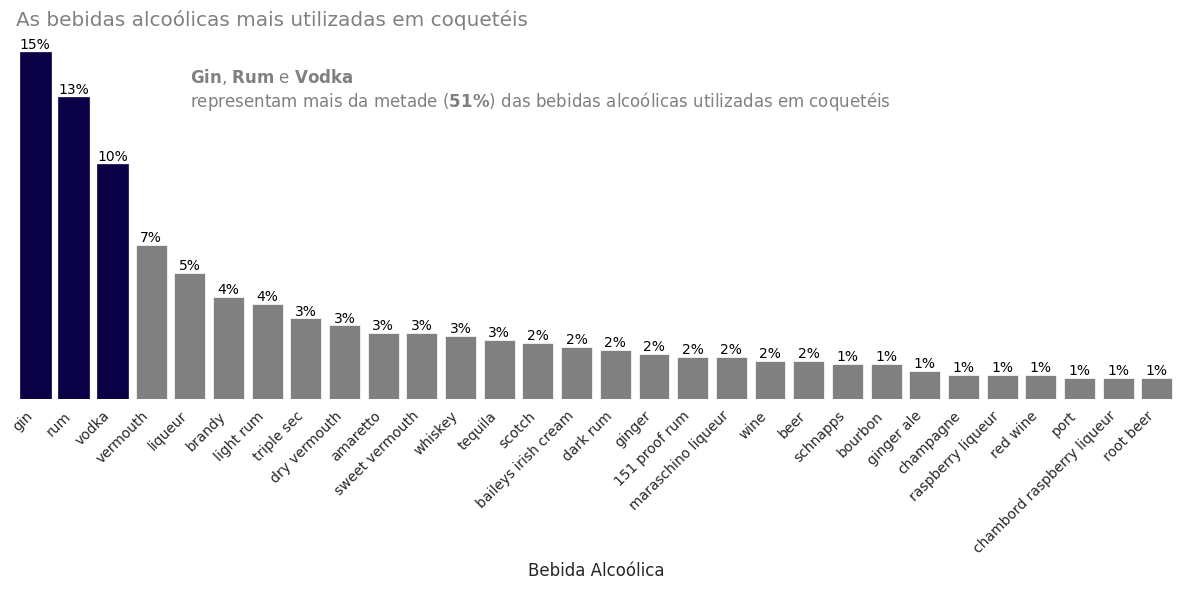

In [ ]:
#agora, vamos plotar os gráficos das bebidas mais utilizadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bebidas_alcool, x='bebida', y='percentagem', color='gray')
sns.despine(left=True, bottom=True)
sns.set_style("whitegrid", {'axes.grid': False})


for i, bar in enumerate(ax.patches):
    if i < 3:
        bar.set_color('#0a0046')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.text(0.15, 0.80, r'$\bf{Gin}$, $\bf{Rum}$ e $\bf{Vodka}$' + '\n' +
        r'representam mais da metade ($\bf{51\%}$) das bebidas alcoólicas utilizadas em coquetéis',
        fontsize=12, color='gray', transform=ax.transAxes)


ax.yaxis.set_visible(False)
plt.title('As bebidas alcoólicas mais utilizadas em coquetéis', loc='left', color='gray')
plt.xlabel('Bebida Alcoólica')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Os copos mais utilizados em coqueteis


In [ ]:
df_alcoolicos.columns

Index(['idDrink', 'name', 'category', 'strIBA', 'alcoholic', 'glass',
       'instructions', 'strCreativeCommonsConfirmed', 'ingredient_1',
       'measure_1', 'ingredient_2', 'measure_2', 'ingredient_3', 'measure_3',
       'ingredient_4', 'measure_4', 'ingredient_5', 'measure_5',
       'ingredient_6', 'measure_6', 'ingredient_7', 'measure_7',
       'ingredient_8', 'measure_8', 'ingredient_9', 'measure_9',
       'ingredient_10', 'measure_10', 'ingredient_11', 'measure_11',
       'ingredient_12', 'measure_12'],
      dtype='object')

In [ ]:
df_glass = df_alcoolicos.groupby('glass')['name'].count().reset_index().sort_values(by = 'name', ascending=False).rename(columns = {'name':'count'})
df_glass['percentage'] = df_glass['count']/df_glass['count'].sum() * 100
df_glass[:8]

,glass,count,percentage
8,Cocktail glass,100,26.315789
17,Highball glass,67,17.631579
27,Old-fashioned glass,36,9.473684
12,Collins glass,29,7.631579
33,Shot glass,23,6.052632
11,Collins Glass,23,6.052632
35,Whiskey sour glass,14,3.684211
18,Hurricane glass,6,1.578947


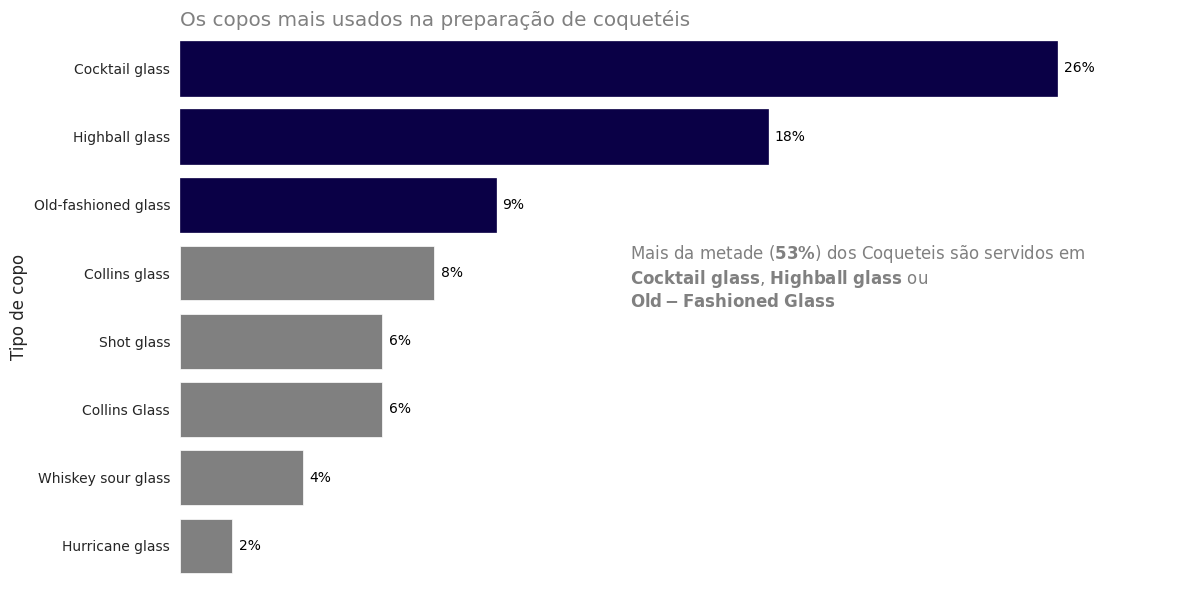

In [ ]:
# plotando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_glass[:8], y='glass', x='percentage', color='grey')
sns.despine(left=True, bottom=True)
sns.set_style("whitegrid", {'axes.grid': False})


for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}%',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                fontsize=10, color='black', xytext=(5,0),
                textcoords='offset points')

for i, bar in enumerate(ax.patches):
    if i < 3:
        bar.set_color('#0a0046')

ax.text(0.45, 0.50,
        r'Mais da metade ($\bf{53\%}$) dos Coqueteis são servidos em' + '\n' +
        r'$\bf{Cocktail\ glass}$, $\bf{Highball\ glass}$ ou' + '\n' +
        r'$\bf{Old-Fashioned\ Glass}$',
        fontsize=12, color='gray', transform=ax.transAxes)


ax.set_xlim(0, 30)
ax.xaxis.set_visible(False)
plt.title('Os copos mais usados na preparação de coquetéis', loc='left', color='gray')
plt.ylabel('Tipo de copo')
plt.tight_layout()
plt.show()

## Copos mais usados em cada categoria de coquetel

In [ ]:
df_glass = df_alcoolicos[df_alcoolicos['category'].isin(['Ordinary Drink', 'Shot', 'Cocktail'])]

glass_category = df_glass.groupby(['glass', 'category']).size().unstack(fill_value=0)

filtered_glass_category = glass_category[(glass_category['Cocktail'] > 1) |
                                         (glass_category['Ordinary Drink'] > 1) |
                                         (glass_category['Shot'] > 1)]

filtered_glass_category


filtered_glass_category.reset_index().sort_values(by = 'glass', ascending=True)

category,glass,Cocktail,Ordinary Drink,Shot
0,Balloon Glass,3,0,0
1,Brandy snifter,0,2,0
2,Champagne Flute,0,2,0
3,Champagne flute,0,3,0
4,Cocktail glass,34,64,0
5,Collins Glass,0,12,2
6,Collins glass,9,18,0
7,Highball glass,23,38,1
8,Hurricane glass,1,2,1
9,Margarita glass,3,1,0


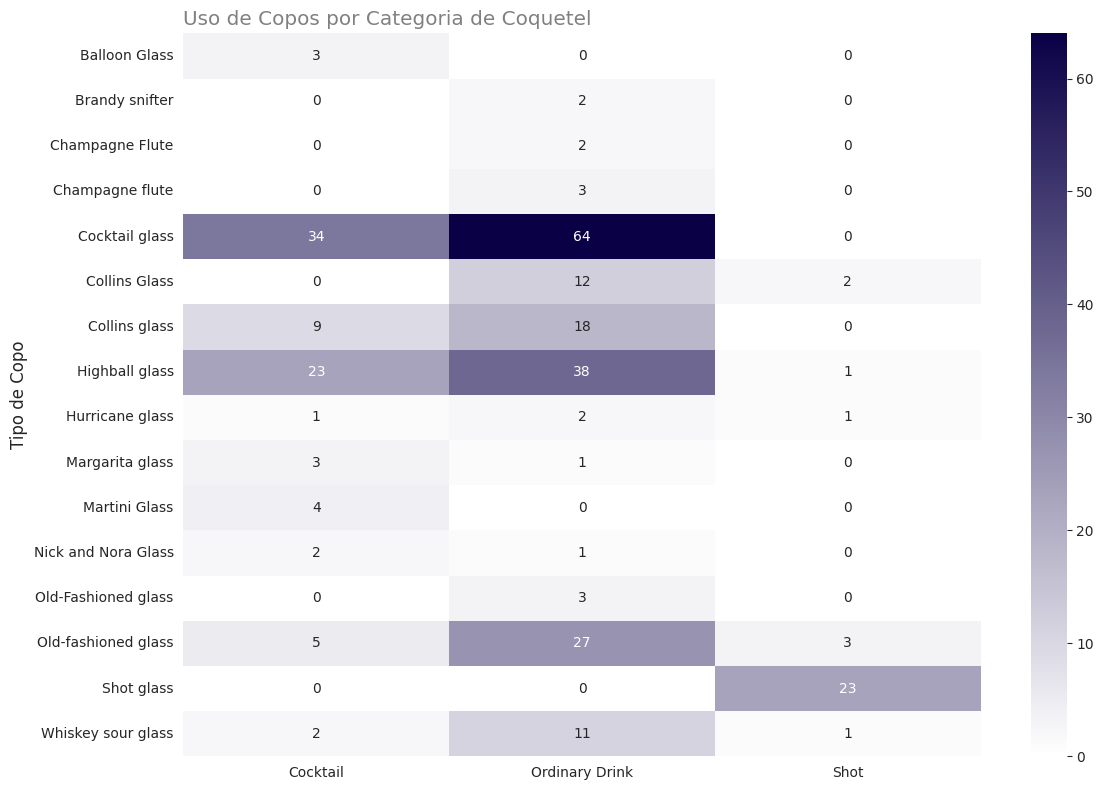

In [ ]:
# quais são os copos mais utilziados por categoria de coquetel
from matplotlib.colors import LinearSegmentedColormap

colors = ["white", "#0a0046"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_glass_category, cmap=cmap, annot=True, fmt='d')
plt.title('Uso de Copos por Categoria de Coquetel', loc='left', color='gray')
plt.ylabel('Tipo de Copo')
plt.xlabel('')
ax.xaxis.set_visible(False)
plt.tight_layout()
plt.show()

## Ingredientes mais comuns em coquetéis

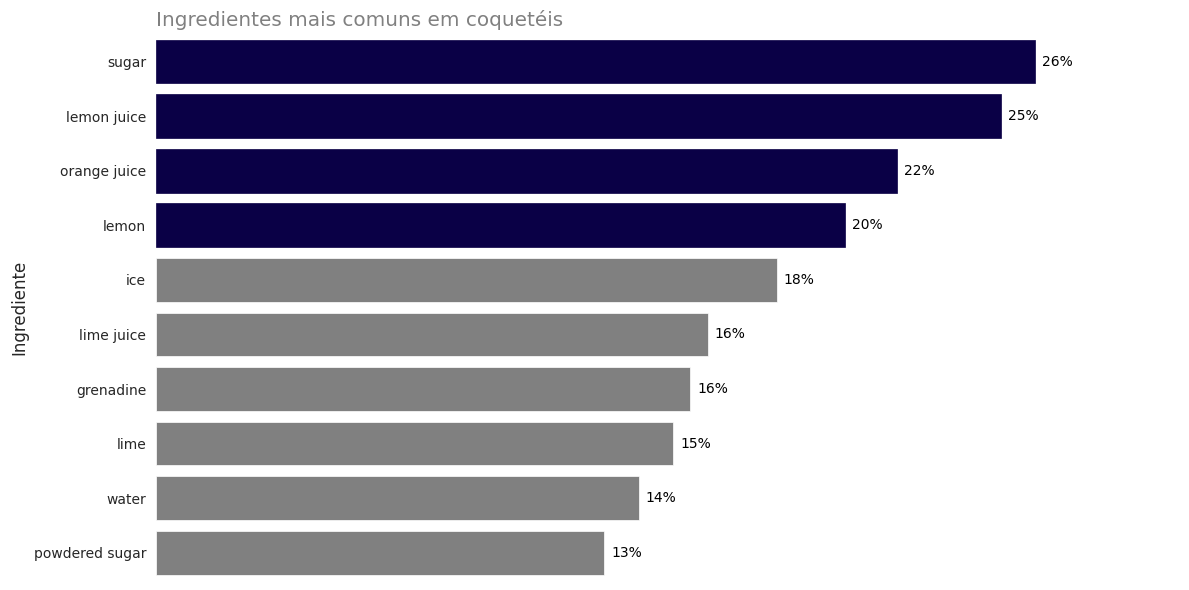

In [ ]:
bebidas_alcoolicas = [bebida.lower().strip() for bebida in bebidas_alcoolicas] #deixando a lista somente em lower

# Contando os ingredientes, excluindo as bebidas alcoólicas
ingredients = pd.concat([df[f'ingredient_{i}'] for i in range(1, 12)]).dropna().str.lower()
ingredients_filtered = ingredients[~ingredients.isin(bebidas_alcoolicas)].value_counts() # retirar as bebidas alcoólicas dos ingredientes


# criando uma coluna com percentuais
ingredients_percentage = (ingredients_filtered / ingredients_filtered.shape[0]) * 100
ingredients_percentage = ingredients_percentage.reset_index()
ingredients_percentage.columns = ['ingredient', 'percentage']


#plotando o gráfico
plt.figure(figsize=(12,6))
ax = sns.barplot(y='ingredient', x='percentage', data=ingredients_percentage.head(10), color='grey')
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}%',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                fontsize=10, color='black', xytext=(5,0),
                textcoords='offset points')

for i, bar in enumerate(ax.patches):
    if i < 4:
        bar.set_color('#0a0046')

plt.title('Ingredientes mais comuns em coquetéis', loc='left', color='gray')
ax.set_xlim(0, 30)
plt.ylabel('Ingrediente')
ax.xaxis.set_visible(False)
plt.yticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

## Coqueteis com o maior número de ingredientes

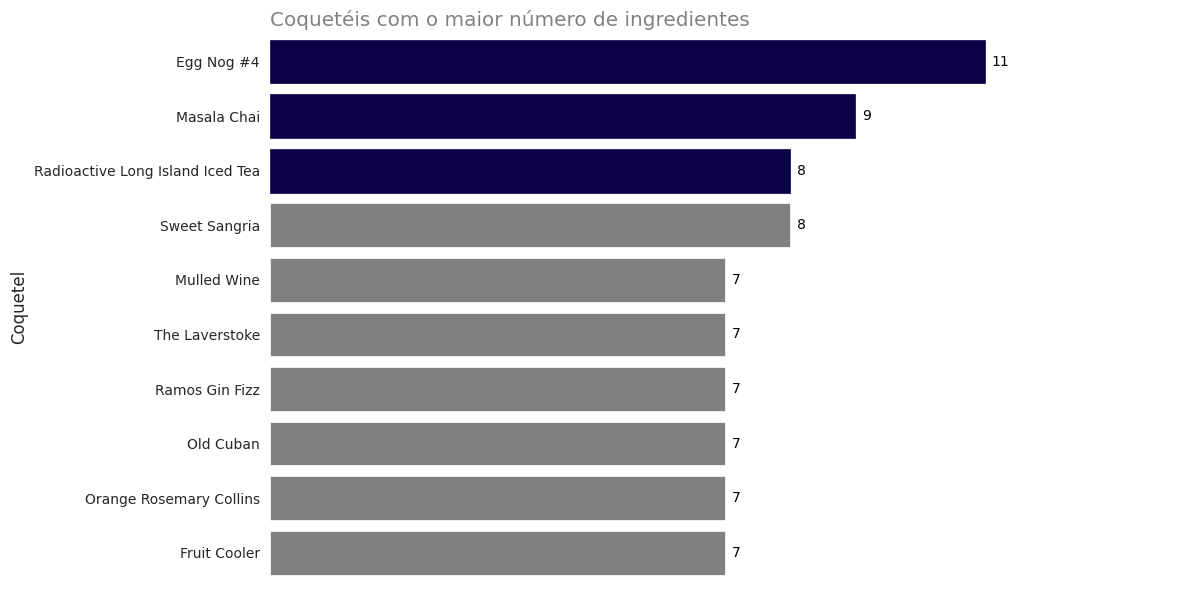

In [ ]:
# criar uma coluna somando o número de ingredientes em cada linha
df['num_ingredients'] = df.apply(lambda row: sum(1 for i in range(1, 13) if pd.notnull(row[f'ingredient_{i}'])), axis=1)
df_ingredients_num = df[['name', 'num_ingredients']].sort_values(by='num_ingredients', ascending=False)

#plotando o gráfico
plt.figure(figsize=(12,6))
ax = sns.barplot(y='name', x='num_ingredients', data=df_ingredients_num.head(10), color='grey')
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                fontsize=10, color='black', xytext=(5,0),
                textcoords='offset points')

for i, bar in enumerate(ax.patches):
    if i < 3:
        bar.set_color('#0a0046')

plt.title('Coquetéis com o maior número de ingredientes', loc='left', color='gray')
ax.set_xlim(0, 14)
plt.ylabel('Coquetel')
ax.xaxis.set_visible(False)
plt.yticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()
